# Modelo KNN
Implementado por Jhoan Sebastian Diaz Salamanca (js.diazs) - 201819861

### Importar librerías y cargar datos

In [1]:
#Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

#Numpy
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 
from sklearn import tree

#Librerías para la visualización (Matplolib)
import matplotlib.pyplot as plt

# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 

# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Para la validación cruzada
from sklearn.model_selection import KFold 

import contractions
from nltk import word_tokenize, sent_tokenize
import inflect


In [2]:
# Importar datos
db_route = '../data/processed_data_min.csv'
df = pd.read_csv(db_route)

# Imprimir número de filas
print('Número de filas: ', df.shape[0])
# Imprimir número de columnas
print('Número de columnas: ', df.shape[1])
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar

df.sample(5)

Número de filas:  195700
Número de columnas:  2


,class,tokens
21738,0,aaa lit stupidest person ex lik ev comp lik is...
26627,0,sound rain on calm sound ear sound rain one ca...
135198,1,clos amam tir liv tir easy target men tran tir...
140848,0,guess kiss girl meampxbbtw saw post said win s...
79670,0,delet reddit account mean quest delete reddit ...


In [3]:
# Contar valores nulos
df.isnull().sum()

class      0
tokens    99
dtype: int64

In [4]:
# Eliminar valores nulos
df.dropna(inplace=True)

### Separación de datos

In [5]:
# División entre variables independientes y dependientes
X = df['tokens']
Y = df['class']

In [6]:
# Vectorización de texto
vectorizer = TfidfVectorizer(max_df=1200, min_df=2, max_features=10000, ngram_range=(1,2))
X_count = vectorizer.fit_transform(X)
print(X_count.shape)

(195601, 10000)


In [7]:
# Separación de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_count, Y, test_size=0.2, random_state=42)

### Modelo

In [8]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train, Y_train)

In [9]:
y_pred = neigh.predict(X_test)

In [10]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[21336,   699],
       [15667,  1419]])

/Users/jhoan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


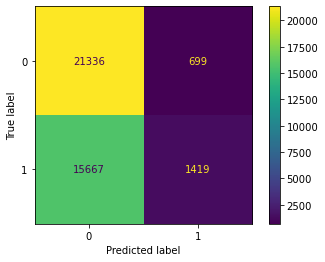

In [11]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

In [12]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.97      0.72     22035
           1       0.67      0.08      0.15     17086

    accuracy                           0.58     39121
   macro avg       0.62      0.53      0.44     39121
weighted avg       0.62      0.58      0.47     39121



### Evaluación

In [13]:
# Predicción
Y_pred = neigh.predict(X_test)

# Evaluación del modelo
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('F1: ', f1_score(Y_test, Y_pred, average='weighted'))
print('Precision: ', precision_score(Y_test, Y_pred, average='weighted'))
print('Recall: ', recall_score(Y_test, Y_pred, average='weighted'))
print(classification_report(Y_test, Y_pred))

Accuracy:  0.5816569106106695
F1:  0.47165582706008274
Precision:  0.6173809151323735
Recall:  0.5816569106106695
              precision    recall  f1-score   support

           0       0.58      0.97      0.72     22035
           1       0.67      0.08      0.15     17086

    accuracy                           0.58     39121
   macro avg       0.62      0.53      0.44     39121
weighted avg       0.62      0.58      0.47     39121



/Users/jhoan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


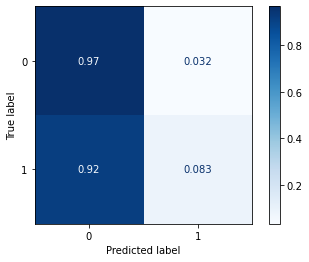

In [14]:
# Matriz de confusión
plot_confusion_matrix(neigh, X_test, Y_test, cmap=plt.cm.Blues, normalize='true')